In [298]:
import torch
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets,transforms

In [299]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [300]:
train_data = datasets.FashionMNIST(
    root="data/fashion-mnist",download=True,train=True,transform=transforms.ToTensor()
    )

test_data = datasets.FashionMNIST(
    root="data/fashion-mnist",
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

In [301]:
len(train_data), len(test_data)

(60000, 10000)

In [302]:
img,label = train_data[0]
label,img

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [303]:
classes_name = train_data.classes,
classes_name = classes_name[0]
len(train_data.classes), classes_name

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [304]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [305]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [306]:
img,label  = train_data[0]
print(f"image shape: {img.shape},\nlabel: {classes_name[label]}")

image shape: torch.Size([1, 28, 28]),
label: Ankle boot


Image shape: torch.Size([1, 28, 28])


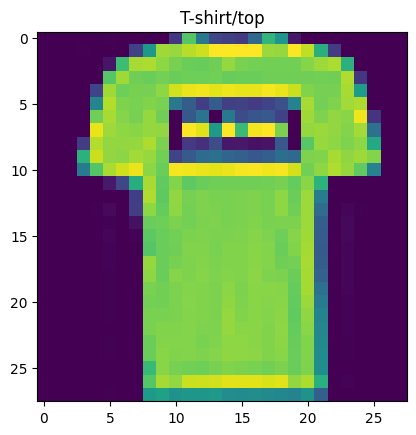

In [307]:
img,label = train_data[1]
plt.title(classes_name[label])
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())

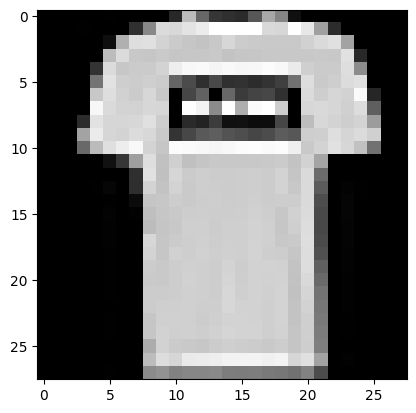

In [308]:
plt.imshow(img.squeeze(),cmap="gray")

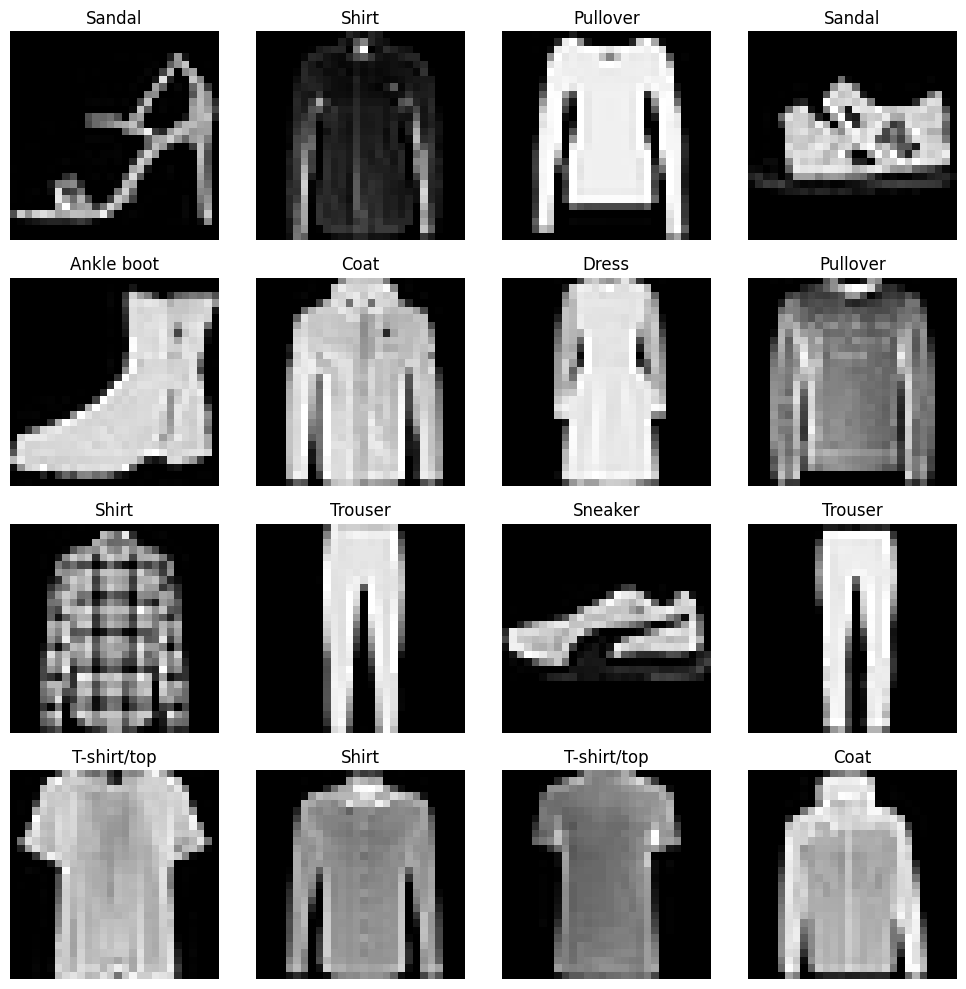

In [309]:
# torch.manual_seed(42)

fig = plt.figure(figsize=(10,10))

n_rows = 4
n_cols = 4

for i in range(1,n_rows * n_cols + 1):
    random_idx = torch.randint(low=0,high=len(train_data),size=(1,)).item()
    img,label = train_data[random_idx]
    fig.add_subplot(n_rows,n_cols,i)
    plt.title(classes_name[label])
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False)

plt.tight_layout()

In [310]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data/fashion-mnist
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data/fashion-mnist
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [311]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

print(f"Train data loader length: {len(train_dataloader)}, batch size {train_dataloader.batch_size}"),
print(
    f"Test data loader length: {len(test_dataloader)}, batch size {test_dataloader.batch_size}"
),

Train data loader length: 1875, batch size 32
Test data loader length: 313, batch size 32


(None,)

In [312]:
len(train_dataloader.dataset)

60000

In [313]:
train_features_batch ,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

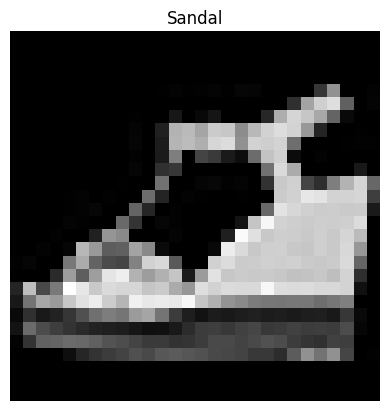

In [314]:
random_idx = torch.randint(0,len(train_features_batch),size=(1,)).item()
img,label = train_features_batch[random_idx],train_label_batch[random_idx]

plt.title(classes_name[label])
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)

In [315]:
from torch import nn
flatten_model = nn.Flatten()

x = train_features_batch[0]
flatten_image = flatten_model(x)


print(f"{x.shape}")
flatten_image.shape

torch.Size([1, 28, 28])


torch.Size([1, 784])

In [316]:
len(train_dataloader)

1875

In [317]:
from typing import Union,List

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:Union[int,List[int]],output_shape:int) -> None:
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self,x:torch.Tensor):
        return self.layers_stack(x)

In [318]:
torch.manual_seed(42)
model_v0 = FashionMNISTModelV0(input_shape=28*28,hidden_units=10,output_shape=len(classes_name))
model_v0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [319]:
import sys
from pathlib import Path

sys.path.append(str(Path("helper_functions.py").resolve().parent.parent))

from helper_functions import plot_decision_boundary

In [320]:
dummy_x = torch.rand(size=(1,1,28,28))

y_pred = model_v0(dummy_x)
y_pred.shape

torch.Size([1, 10])

In [321]:
model_v0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [322]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v0.parameters(),lr=0.1)
accuracy_fn= torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_name))

In [323]:
def print_train_time(start:float,end:float,device:torch.device = None):
    total_time = end - start
    print(f"Total time on {device} is: {total_time:.3f} in seconds")
    return total_time

In [324]:
from timeit import default_timer as timer

start = timer()

end = timer()
print_train_time(start,end,device="cpu")

Total time on cpu is: 0.000 in seconds


1.1300202459096909e-05

In [325]:
# from tqdm.auto import tqdm

# start = timer()

# torch.manual_seed(42)

# epochs = 3
# model_v0.to("cpu")

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n----")

#     train_loss = 0
#     for batch,(X,y) in enumerate(train_dataloader):
#         model_v0.train()
#         y_logits = model_v0(X)
#         y_preds = torch.argmax(y_logits,dim=1)

#         loss = loss_fn(y_logits, y)
#         train_loss += loss

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch % 400 == 0:
#             print(f"Looked at batch {batch * len(X)} / { len(train_dataloader.dataset)} samples")
#             train_acc = accuracy_fn(y_preds.cpu(), y.cpu())
#     train_loss /= len(train_dataloader)

#     model_v0.eval()
#     test_loss = 0
#     with torch.inference_mode():
#         for X_test,y_test in test_dataloader:
#             y_logits = model_v0(X_test)
#             y_preds = torch.argmax(y_logits,dim=1)

#             loss = loss_fn(y_logits, y_test)
#             test_loss += loss

#             test_acc = accuracy_fn(y_preds, y_test)

#         test_loss /= len(test_dataloader)

#     print(f"Train loss: {train_loss.item()} | Train Acc: {train_acc}")
#     print(f"Test loss: {test_loss} | Test Acc: {test_acc}")
# end = timer()

# print_train_time(start,end,device="cpu")

In [326]:
model_v0.to("cuda")

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [327]:
from tqdm.auto import tqdm

start = timer()

# torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss = 0

    for batch,(X,y) in enumerate(train_dataloader):
        model_v0.train()
        X = X.to("cuda")
        y = y.to("cuda")

        y_logits = model_v0(X)
        y_preds = torch.argmax(y_logits, dim=1)
        loss = loss_fn(y_logits, y)

        train_loss += loss
        train_acc = accuracy_fn(y_preds.to("cpu"), y.to("cpu"))
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at batch: {batch * len(X)} / {len(train_dataloader.dataset)}")

    test_loss = 0 
    for X_test,y_test in test_dataloader:
        X_test = X_test.to("cuda")
        y_test = y_test.to("cuda")
        y_logits = model_v0(X_test)
        y_preds = torch.argmax(y_logits,dim=1)

        test_loss += loss_fn(y_logits.cpu(), y_test.cpu())
        test_acc = accuracy_fn(y_preds.cpu(), y_test.cpu())

    train_loss /= len(train_dataloader)
    test_loss /= len(test_dataloader)
    print(f"Train loss: {train_loss} | Train Acc: {train_acc}")
    print(f"Test loss: {test_loss} | Test Acc: {test_acc}")


end = timer()

total_time = print_train_time(start,end,"cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


 33%|███▎      | 1/3 [00:30<01:00, 30.20s/it]

Train loss: 0.5877593755722046 | Train Acc: 0.8125
Test loss: 0.6322419047355652 | Test Acc: 0.8125
Epoch: 1
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


 67%|██████▋   | 2/3 [01:26<00:45, 45.45s/it]

Train loss: 0.47600895166397095 | Train Acc: 0.84375
Test loss: 0.5046310424804688 | Test Acc: 0.8125
Epoch: 2
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


100%|██████████| 3/3 [01:44<00:00, 34.90s/it]

Train loss: 0.45246896147727966 | Train Acc: 0.9375
Test loss: 0.5012819170951843 | Test Acc: 0.9375
Total time on cuda is: 104.716 in seconds


In [328]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,acc_fn,total_time:float,device:torch.device):
    loss = 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_logits = model(X)
            y_preds = torch.argmax(y_logits,dim=1)

            loss += loss_fn(y_logits,y)
            acc = acc_fn(y_preds.cpu(),y.cpu())
        loss /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": round(loss.item(),4),
            "model_acc":acc,
            "total_time": total_time}

In [329]:
model_v0_results = eval_model(model_v0.cpu(),test_dataloader,loss_fn,accuracy_fn,total_time,device="cpu")
model_v0_results

100%|██████████| 313/313 [00:00<00:00, 405.79it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5013,
 'model_acc': tensor(0.9375),
 'total_time': 104.71584089985117}

In [330]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU(),
        )

    def forward(self,x):
        return self.layers(x)

In [331]:
torch.manual_seed(42)
model_v1 = FashionMNISTModelV1(input_shape=28*28,hidden_units=10,output_shape=len(classes_name)).to(device)

In [332]:
next(model_v1.parameters()).device

device(type='cuda', index=0)

In [333]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass",num_classes=len(classes_name))

In [334]:
def train_step(model:nn.Module,data_loader:torch.utils.data.DataLoader,device:torch.device,loss_fn:nn.Module,optimizer:torch.optim.Optimizer,acc_fn:torchmetrics.Metric):

    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_logits = model(X)
        y_preds = torch.argmax(y_logits,dim=1)

        loss = loss_fn(y_logits, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 400 == 0:
        #     print(f"Lookead at {batch * len(X)} / {len(train_dataloader.dataset)}")

    train_loss /= len(train_dataloader)
    train_acc = acc_fn(y_preds.cpu(),y.cpu())
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc}")

In [335]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device,
):
    loss = 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_logits = model(X)
            y_preds = torch.argmax(y_logits, dim=1)

            loss += loss_fn(y_logits, y)
            acc = acc_fn(y_preds.cpu(), y.cpu())
        loss /= len(data_loader)
        print(f"Test loss: {loss:.4f} | Test acc: {acc:.4f}")

In [336]:
# start = timer()
# model_v1.to("cpu")
# torch.manual_seed(42)

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n----")

#     train_step(
#         model=model_v1,
#         data_loader=train_dataloader,
#         device="cpu",
#         acc_fn=accuracy_fn,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#     )
#     test_step(model_v1, test_dataloader, loss_fn, accuracy_fn, device="cpu")
# end = timer()

# print_train_time(start, end, device="cpu")

In [337]:
start = timer()
model_v1.to("cuda")
# torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(
        model=model_v1,
        data_loader=train_dataloader,
        device="cuda",
        acc_fn=accuracy_fn,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(model_v1,test_dataloader,loss_fn,accuracy_fn,device)
end = timer()

total_time = print_train_time(start,end,device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 1.0588 | Train Acc: 0.75


 33%|███▎      | 1/3 [00:07<00:14,  7.02s/it]

Test loss: 0.9951 | Test acc: 0.7500
Epoch: 1
----
Train Loss: 0.9118 | Train Acc: 0.75


 67%|██████▋   | 2/3 [00:13<00:06,  6.98s/it]

Test loss: 0.9574 | Test acc: 0.6875
Epoch: 2
----
Train Loss: 0.8817 | Train Acc: 0.6875


100%|██████████| 3/3 [00:20<00:00,  7.00s/it]

Test loss: 0.8910 | Test acc: 0.6875
Total time on cuda is: 21.001 in seconds


In [338]:
model_v0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5013,
 'model_acc': tensor(0.9375),
 'total_time': 104.71584089985117}

In [339]:
model_v1_results = eval_model(
    model_v1, test_dataloader, loss_fn, accuracy_fn,total_time,device 
)
model_v1_results

100%|██████████| 313/313 [00:00<00:00, 392.36it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.891,
 'model_acc': tensor(0.6875),
 'total_time': 21.001381000038236}

In [340]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,out_features=output_shape),

        )
    def forward(self,x):
        x  = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [341]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Images shape {images.shape}")
print(f"Image shape {test_image.shape}")

Images shape torch.Size([32, 3, 64, 64])
Image shape torch.Size([3, 64, 64])


In [342]:
torch.manual_seed(42)
conv_layers = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,padding=0,stride=1)
conv_layers(test_image).shape

torch.Size([10, 62, 62])

In [343]:
print(f"Test image shape: {test_image.shape}")


after_conv_layer = conv_layers(test_image)
print(f"After go in conv layer : {after_conv_layer.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(after_conv_layer)
print(f"After go in conv layer and max pool layer: {max_pool_tensor.shape}")

Test image shape: torch.Size([3, 64, 64])
After go in conv layer : torch.Size([10, 62, 62])
After go in conv layer and max pool layer: torch.Size([10, 31, 31])


In [344]:
random_tensor = torch.randn(size=(1,1,28,28)).to(device)


In [351]:
torch.manual_seed(42)
model_v2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(classes_name)).to(device)

In [352]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_name))

In [353]:
start = timer()
model_v2.to("cuda")
# torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(
        model=model_v2,
        data_loader=train_dataloader,
        device="cuda",
        acc_fn=accuracy_fn,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(model_v2, test_dataloader, loss_fn, accuracy_fn, device)
end = timer()

total_time = print_train_time(start, end, device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 0.5788 | Train Acc: 0.875


 33%|███▎      | 1/3 [00:10<00:20, 10.31s/it]

Test loss: 0.3969 | Test acc: 0.9375
Epoch: 1
----
Train Loss: 0.3579 | Train Acc: 0.90625


 67%|██████▋   | 2/3 [00:29<00:15, 15.79s/it]

Test loss: 0.3873 | Test acc: 1.0000
Epoch: 2
----
Train Loss: 0.3190 | Train Acc: 0.8125


100%|██████████| 3/3 [00:47<00:00, 15.86s/it]

Test loss: 0.3247 | Test acc: 0.9375
Total time on cuda is: 47.586 in seconds


In [354]:
model_v2_results = eval_model(
    model_v2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device=device,
    total_time=total_time,
)
model_v2_results

100%|██████████| 313/313 [00:01<00:00, 303.36it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3247,
 'model_acc': tensor(0.9375),
 'total_time': 47.5860472000204}

In [355]:
import pandas as pd 

df = pd.DataFrame([model_v0_results,model_v1_results,model_v2_results])
df

,model_name,model_loss,model_acc,total_time
0,FashionMNISTModelV0,0.5013,tensor(0.9375),104.715841
1,FashionMNISTModelV1,0.8910,tensor(0.6875),21.001381
2,FashionMNISTModelV2,0.3247,tensor(0.9375),47.586047


<Axes: xlabel='model_name', ylabel='model_loss'>

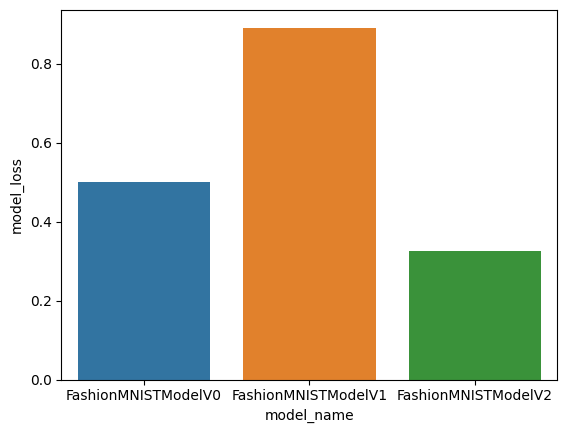

In [356]:
import seaborn as sns
sns.barplot(data=df,x="model_name" ,y="model_loss",hue="model_name")

In [401]:
def make_predictions(model:nn.Module,data:list,device:torch.device):
    model.eval()
    model.to(device)
    pred_probs = []
    with torch.inference_mode():
        for sample in data:
            sample = sample.unsqueeze(dim=0).to(device)
            y_logit = model(sample).squeeze()
            y_prob = torch.softmax(y_logit,dim=0)

            pred_probs.append(y_prob)

    return torch.stack(pred_probs)
# torhc stack

In [402]:
img,label = test_data[0][:10]
# img

Text(0.5, 1.0, 'Sandal')

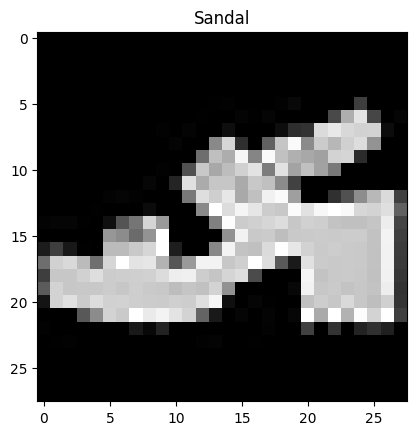

In [403]:
import random
random.seed(42)
test_samples = []
test_label = []

for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_label.append(label)
    
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(classes_name[test_label[0]])

In [404]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [406]:
pred_probs = make_predictions(model_v2, test_samples, device=device)


[tensor([1.6699e-08, 2.6865e-10, 1.5480e-09, 1.6503e-09, 1.2016e-08, 9.9998e-01,
         2.1281e-07, 4.9245e-07, 7.8568e-07, 1.9636e-05], device='cuda:0'),
 tensor([3.7347e-02, 8.0291e-01, 1.2436e-03, 5.6285e-02, 5.9536e-02, 1.8507e-04,
         4.2359e-02, 8.3394e-05, 3.4205e-05, 1.1828e-05], device='cuda:0'),
 tensor([1.6255e-05, 1.7687e-07, 2.1493e-06, 2.7722e-07, 5.9175e-06, 7.0451e-04,
         1.2378e-05, 9.5075e-01, 4.4348e-04, 4.8065e-02], device='cuda:0'),
 tensor([1.2296e-03, 1.8491e-04, 2.4876e-01, 1.1717e-04, 7.4860e-01, 3.4134e-06,
         1.0707e-03, 8.7292e-07, 2.1272e-05, 1.7290e-05], device='cuda:0'),
 tensor([2.4537e-02, 2.8738e-05, 1.4956e-04, 9.6269e-01, 1.1507e-04, 7.1422e-06,
         1.2431e-02, 1.9971e-05, 1.2432e-05, 6.6524e-06], device='cuda:0'),
 tensor([6.0020e-01, 1.5325e-05, 4.4460e-04, 9.8991e-04, 4.3489e-03, 1.1484e-06,
         3.9327e-01, 3.6064e-07, 7.3078e-04, 3.5589e-07], device='cuda:0'),
 tensor([4.3326e-05, 5.0338e-06, 1.4256e-02, 1.0608e-06, 9

In [409]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

AttributeError: 'list' object has no attribute 'argmax'